This notebook is written by Brittaney Everitt 10211957 

In [ ]:
#mount my google drive files in the notebook 
#I do this so that I can load the images in the next cell 
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


# Darknet Model

I reimplemented the DarkCovidNet model using keras / tensorflow

Load in all of the data 

In [ ]:
import pandas as pd

#load in the labels
allLabels = pd.read_csv('drive/My Drive/All_labels_CSV.csv') #stores the label column in a 2D data frame, with axis labelled 'label'
print(allLabels)

y = allLabels['Label'].to_numpy()
print(y)

           Name  Label
0         covid      0
1         covid      0
2         covid      0
3         covid      0
4         covid      0
...         ...    ...
1120  pneumonia      2
1121  pneumonia      2
1122  pneumonia      2
1123  pneumonia      2
1124  pneumonia      2

[1125 rows x 2 columns]
[0 0 0 ... 2 2 2]


In [ ]:
from tqdm import tqdm
from PIL import Image
import os
import numpy as np

#this function loads in all of the x-ray image data from a folder and stores them in a numpy array 
def load_data(folder):
    images = [] #instantiate an empty array to store all image data 

    count = 0
    #loop through every image in the folder/ directory 
    for file in os.listdir(folder):

      #open the current image file and convert it to an array 
      image = Image.open( 
        os.path.join(folder, file) #concatentaes folder path name and individual image file name, returns a string which represents the concatenated path of current image file in the loop
      ).convert('LA').resize((256, 256)) #converts the image to grayscale and resizes it 256 pixels by 256 pixels (width,height)

      arr = np.array(image) #converts the Image object to a NumPy array, the values of each pixel are stored in the array 
      images.append(arr) #append array of image pixels to array of all images

      #print out the number of images loaded in to make sure all images are loaded into the array 
      print(count)
      count+=1

    #return a numpy array of all of the images
    return np.array(images)

allImages = load_data('drive/My Drive/AllImages') 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
#Normalize the data
import tensorflow as tf

allImages = tf.keras.utils.normalize(allImages)

print(allImages)

[[[[0.00392154 0.99999231]
   [0.00392154 0.99999231]
   [0.00392154 0.99999231]
   ...
   [0.00392154 0.99999231]
   [0.00392154 0.99999231]
   [0.00392154 0.99999231]]

  [[0.00392154 0.99999231]
   [0.00392154 0.99999231]
   [0.00392154 0.99999231]
   ...
   [0.00392154 0.99999231]
   [0.00392154 0.99999231]
   [0.00392154 0.99999231]]

  [[0.00392154 0.99999231]
   [0.00392154 0.99999231]
   [0.00392154 0.99999231]
   ...
   [0.00392154 0.99999231]
   [0.00392154 0.99999231]
   [0.00392154 0.99999231]]

  ...

  [[0.49171966 0.87075357]
   [0.52428373 0.85154364]
   [0.52910129 0.84855867]
   ...
   [0.24700371 0.96901454]
   [0.21814596 0.97591615]
   [0.17003633 0.9854378 ]]

  [[0.49430222 0.86929012]
   [0.53149107 0.84706389]
   [0.53623279 0.84407014]
   ...
   [0.23625434 0.97169125]
   [0.21083787 0.97752104]
   [0.16627992 0.98607859]]

  [[0.45970712 0.88807058]
   [0.49687177 0.86782397]
   [0.4994283  0.86635522]
   ...
   [0.20717044 0.97830486]
   [0.1775268  0.984115

Split the code into training and testing sets  


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# split into training and validation set: 80% training and 20% validation like in the paper
X_train, X_test, y_train, y_test = train_test_split(allImages,y, test_size=0.2, random_state=27, stratify=y)

#visualize the data to ensure distributions of each class are the same 
print(np.unique(y, return_counts=True))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))
print(X_train)
print(y_test)

(array([0, 1, 2]), array([125, 500, 500]))
(array([0, 1, 2]), array([100, 400, 400]))
(array([0, 1, 2]), array([ 25, 100, 100]))
[[[[0.5524351  0.83355592]
   [0.58722762 0.80942185]
   [0.58722762 0.80942185]
   ...
   [0.59545356 0.80338973]
   [0.59545356 0.80338973]
   [0.56142206 0.82752962]]

  [[0.59341436 0.80489714]
   [0.62655691 0.77937567]
   [0.62655691 0.77937567]
   ...
   [0.61522399 0.78835236]
   [0.61135917 0.79135325]
   [0.57881561 0.81545845]]

  [[0.59545356 0.80338973]
   [0.62840811 0.77788383]
   [0.62655691 0.77937567]
   ...
   [0.59949768 0.80037649]
   [0.59136366 0.806405  ]
   [0.5547002  0.83205029]]

  ...

  [[0.35873377 0.93343992]
   [0.39304872 0.91951765]
   [0.38074981 0.9246781 ]
   ...
   [0.17378533 0.98478356]
   [0.1775268  0.98411597]
   [0.1775268  0.98411597]]

  [[0.42869544 0.90344907]
   [0.45418745 0.89090615]
   [0.44861497 0.89372513]
   ...
   [0.20717044 0.97830486]
   [0.21449642 0.97672477]
   [0.21083787 0.97752104]]

  [[0.445

In [ ]:
#one_hot encode labels 
from keras.utils import to_categorical

#one hot encode the training labels so that it can be used in the weight update calculation
encodedLabels = to_categorical(y_train)

print(encodedLabels)

#One hot encode the testing labels
encodedLabelsVal = to_categorical(y_test)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


Model 

- This model is a modified version of DarkCovideNet code from the author's Github at: https://github.com/muhammedtalo/COVID-19

- Ozturk T, Talo M, Yildirim EA, Baloglu UB, Yildirim O, Acharya UR. Automated detection of COVID-19 cases using deep neural networks with X-ray images. Computers in biology and medicine. 2020 Jun 1;121:103792.

- The authors use PyTorch and fastai. This code uses Keras and Tensorflow



In [ ]:
#create the padding size rule 
for_pad = lambda s: s if s > 2 else 3

In [ ]:
#this function defines one DarkCovidNet block 
def conv_block(input_layer,output_size,kernel_size=3):
  p1 = tf.keras.layers.ZeroPadding2D(padding=(for_pad(kernel_size)-1)//2)(input_layer)
  c1 = tf.keras.layers.Conv2D(output_size, kernel_size, strides = (1,1), padding='valid', use_bias = False)(p1)
  b1 = tf.keras.layers.BatchNormalization(momentum=0.1,epsilon=0.00001)(c1)
  a1 = tf.keras.layers.LeakyReLU(alpha = 0.1)(b1)
  return a1

In [ ]:
#this function defines one triple block from the DarkCovidNet model 
def triple_block(input_layer,output_size):
  c1 = conv_block(input_layer,output_size)
  c2 = conv_block(c1,output_size/2,kernel_size=1)
  c3 = conv_block(c2,output_size)
  return c3

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input 
from tensorflow.keras.layers import BatchNormalization

#The layers are arranged in "sequential" order
def build():
    #the shape of the expected input is the 256x256 image, with two channels  
    #the channel 2 is there potentially because some images have a bit-depth of more than 8 
    img_in = Input(shape=(256, 256, 2)) #instantiates a Keras tensor, the input node 
    
    #first convolution block 
    c1 = conv_block(img_in,8)
    #first max pool 
    p1 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides=2)(c1)

    #second conv block 
    c2 = conv_block(p1,16)

    #second max pool 
    p2 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides=2)(c2)

    #third conv
    c3 = triple_block(p2,32)

    #third max pool 
    p3 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides=2)(c3)

    #fourth conv
    c4 = triple_block(p3,64)

    #fourth max pool 
    p4 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides=2)(c4)

    #fifth conv
    c5 = triple_block(p4,128)

    #fifth max pool 
    p5 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides=2)(c5)

    #sixth conv
    c6 = triple_block(p5,256)

    #seventh conv
    c7 = conv_block(c6,128,kernel_size=1)
    #eighth conv
    c8 = conv_block(c7,256)
    #ninth conv
    c9 = tf.keras.layers.Conv2D(3, kernel_size=3, strides = (1,1), padding = 'same',activation = 'relu')(c8)

    #final batch normalization
    batch = tf.keras.layers.BatchNormalization(momentum=0.1,epsilon=0.00001)(c9)

    #Flattened layer 
    flattened = Flatten()(batch) 
    
    #final fully connected layer
    output = Dense(3,activation='softmax')(flattened)

    #create Model using input tensor and output layer 
    model = tf.keras.Model(inputs=img_in, outputs=output) 
    return model


model = build() #build the fully connected neural network 
#compile the model 
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate = 0.003), #adam optimizer
        loss=tf.keras.losses.CategoricalCrossentropy(), #categorical cross entropy loss 
        metrics=['CategoricalAccuracy','AUC'] 
        )

#displays a summary of the neural network model 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 2)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 258, 258, 2)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 8)       144       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 8)       32        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 8)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 130, 130, 8)       0     

Run the model


Training

In [ ]:
#Train the model on the training data
history = model.fit(x = X_train, #training data
                    y = encodedLabels, #label 
                    verbose = 1,
                    batch_size = 32,
                    epochs=100,
                    validation_split = 0.2
                    )

Epoch 1/100
23/23 [==============================] - 38s 149ms/step - loss: 1.6200 - categorical_accuracy: 0.4546 - auc: 0.6258 - val_loss: 1.0191 - val_categorical_accuracy: 0.4333 - val_auc: 0.6587
Epoch 2/100
23/23 [==============================] - 2s 70ms/step - loss: 0.9463 - categorical_accuracy: 0.4655 - auc: 0.6929 - val_loss: 1.0362 - val_categorical_accuracy: 0.4444 - val_auc: 0.6872
Epoch 3/100
23/23 [==============================] - 2s 70ms/step - loss: 0.9568 - categorical_accuracy: 0.4963 - auc: 0.6966 - val_loss: 1.0703 - val_categorical_accuracy: 0.4278 - val_auc: 0.6652
Epoch 4/100
23/23 [==============================] - 2s 71ms/step - loss: 0.9877 - categorical_accuracy: 0.4562 - auc: 0.6848 - val_loss: 0.9872 - val_categorical_accuracy: 0.4722 - val_auc: 0.6891
Epoch 5/100
23/23 [==============================] - 2s 70ms/step - loss: 0.9634 - categorical_accuracy: 0.4872 - auc: 0.7024 - val_loss: 0.9796 - val_categorical_accuracy: 0.5222 - val_auc: 0.7082
Epoch 6/

In [ ]:
#Display the results of the training data
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

#apply the trained neural network to the training data
y_predTrain = model.predict(X_train)

#get the predicted labels of the data
y_predLabelTrain = np.argmax(y_predTrain,axis = 1) 

#display accuracy, f1-score, precision and recall
print(classification_report(y_train,y_predLabelTrain))
print("Overall precision",round(precision_score(y_train,y_predLabelTrain, average='micro'),2))
print("Overall recall",round(recall_score(y_train,y_predLabelTrain, average='micro'),2))
print(" ")

#print the confusion matrix
print(confusion_matrix(y_train,y_predLabelTrain))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       100
           1       0.79      0.93      0.85       400
           2       0.92      0.78      0.84       400

    accuracy                           0.85       900
   macro avg       0.87      0.83      0.84       900
weighted avg       0.86      0.85      0.85       900

Overall precision 0.85
Overall recall 0.85
 
[[ 78  19   3]
 [  3 372  25]
 [  6  82 312]]


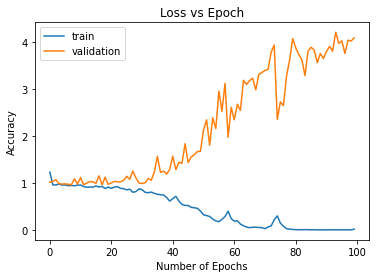

In [ ]:
from matplotlib import pyplot as plt
#display the loss vs epochs 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Testing 

In [ ]:
#apply the neural network model to the testing data 
y_pred = model.predict(X_test) 

#get the predicted labels of the data 
y_predLabel = np.argmax(y_pred,axis = 1) 


#display the results of the testing data
#display accuracy, f1-score, precision and recall
print(classification_report(y_test,y_predLabel))
print("Overall precision",round(precision_score(y_test,y_predLabel, average='micro'),2))
print("Overall recall",round(recall_score(y_test,y_predLabel, average='micro'),2))
print(" ")

#print the confusion matrix
print(confusion_matrix(y_test,y_predLabel))

#confusion matrix
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classes = ['Covid-19','Pneumonia','No_findings']
print(y_test)
print(y_predLabel)

confusion_matrix2 = confusion_matrix(y_test,y_predLabel)
training_mat = ConfusionMatrixDisplay(confusion_matrix2,display_labels = classes)
training_mat.plot()

              precision    recall  f1-score   support

           0       0.32      0.24      0.27        25
           1       0.43      0.64      0.51       100
           2       0.48      0.27      0.35       100

    accuracy                           0.43       225
   macro avg       0.41      0.38      0.38       225
weighted avg       0.44      0.43      0.41       225

Overall precision 0.43
Overall recall 0.43
 
[[ 6 16  3]
 [10 64 26]
 [ 3 70 27]]
